In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [ ]:
data = pd.read_excel("./data/Incendios-Forestales-2021.xlsx")
print(data.info())

## ¿Cuáles son las causas más comunes de los incendios forestales? (Refactoriazada)

In [126]:
df_causes = data.loc[:, ["Causas"]]

In [122]:
causes = data["Causas"].value_counts()

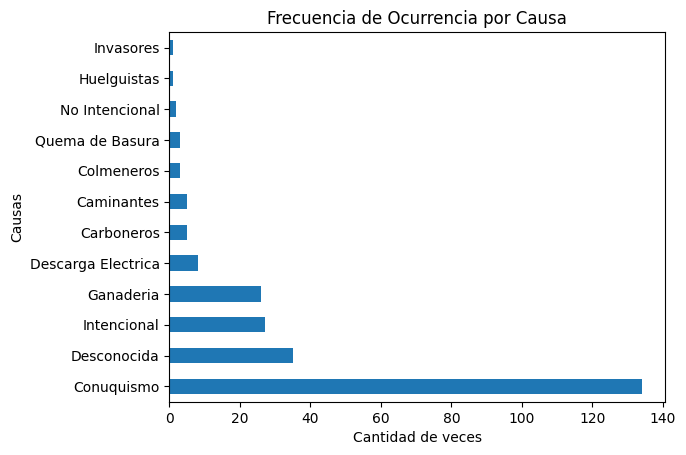

In [127]:
# Graficar
causes.plot(kind='barh')

# Agregar etiquetas y título
plt.xlabel('Cantidad de veces')
plt.ylabel('Causas')
plt.title('Frecuencia de Ocurrencia por Causa')

# Mostrar el gráfico
plt.show()

## ¿Cuáles son los municipios/provincias más afectados por los incendios forestales?(Refactorizada)


### Municipios

In [137]:
df_forest_fires = data.loc[:, ["Municipio","Provincia"]]

df_all_municipalities =  df_forest_fires["Municipio"].value_counts()


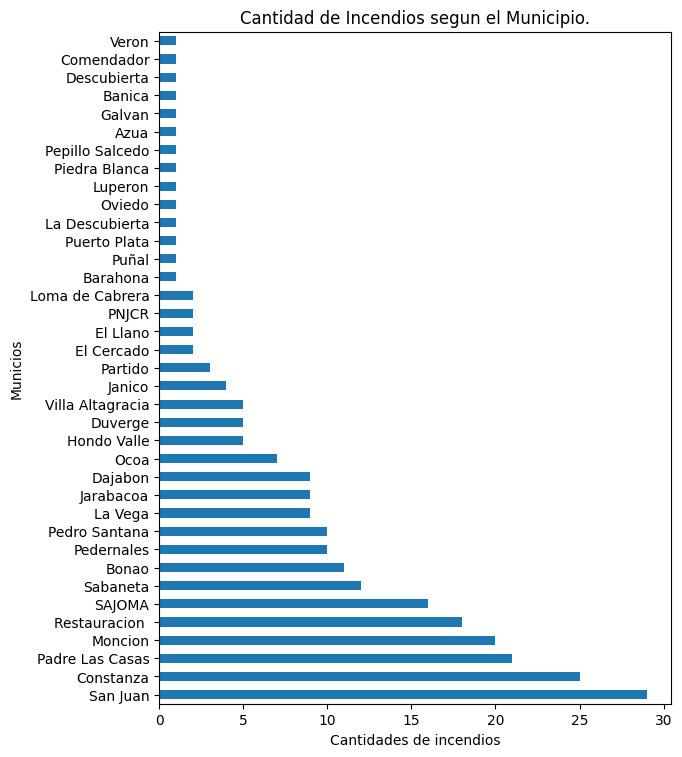

In [140]:
df_all_municipalities.plot(kind='barh')
plt.subplots_adjust(left=0.1, right=0.9, top=1.5, bottom=0.1)

# Agregar etiquetas y título
plt.xlabel('Cantidades de incendios')
plt.ylabel('Municios')
plt.title('Cantidad de Incendios segun el Municipio.')

# Mostrar el gráfico
plt.show()

### Provincias

In [ ]:
df_all_province = df_forest_fires["Provincia"].value_counts()

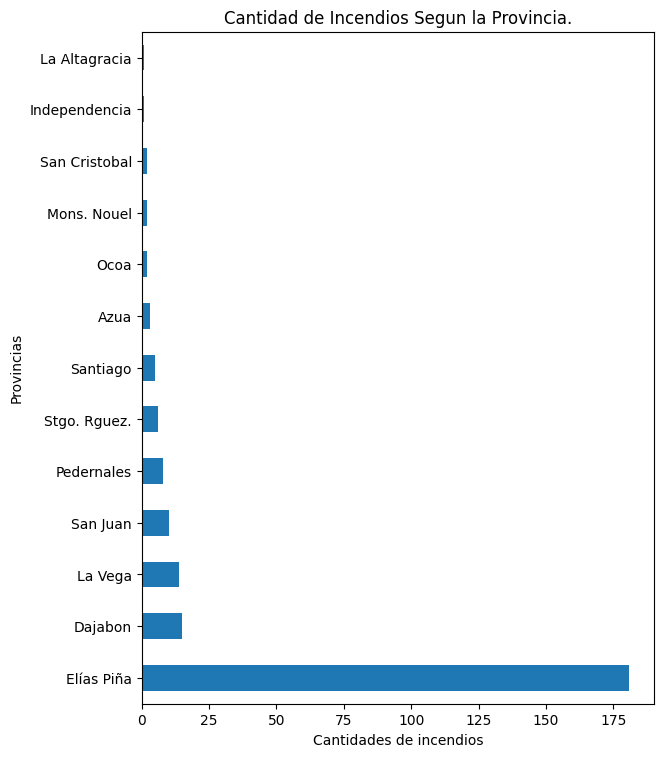

In [145]:
df_all_province.plot(kind='barh')
plt.subplots_adjust(left=0.1, right=0.9, top=1.5, bottom=0.1)

# Agregar etiquetas y título
plt.xlabel('Cantidades de incendios')
plt.ylabel('Provincias')
plt.title('Cantidad de Incendios Segun la Provincia.')

# Mostrar el gráfico
plt.show()

In [178]:
import folium
import json

# Coordenadas de La Vega
coordenadas_la_vega = [
    [19.171998, -71.317559],
    [19.170645, -71.320389],
    [19.171484, -71.323307],
    [19.173222, -71.326225],
    [19.171005, -71.330730],
    [19.171664, -71.340120],
    [19.170825, -71.342530],
    [19.168908, -71.342403],
    [19.166810, -71.343419],
    [19.165911, -71.344243],
    [19.164113, -71.344053],
    [19.162555, -71.342467],
    [19.161477, -71.342657],
    [19.160338, -71.346020],
    [19.154465, -71.343355],
    [19.151391, -71.342735],
    [19.143665, -71.345546],
    [19.142208, -71.344471],
    [19.139940, -71.345342],
    [19.137297, -71.345579],
    [19.136250, -71.344180],
    [19.133831, -71.343309],
    [19.129517, -71.339678],
    [19.126981, -71.339013],
    [19.126013, -71.339290],
    [19.125386, -71.338432],
    [19.125255, -71.339871],
    [19.123347, -71.340390],
    [19.122427, -71.340854],
    [19.122215, -71.341363],
    [19.121245, -71.341154],
    [19.119036, -71.340978],
    [19.118922, -71.341393],
    [19.118503, -71.341372],
    [19.117731, -71.341583],
    [19.116933, -71.343231],
]


# Crear un mapa centrado en la República Dominicana
mapa = folium.Map(location=[18.735693, -70.162651], zoom_start=9)

# Marcar las coordenadas de La Vega
folium.Polygon(locations=coordenadas_la_vega, color='blue', fill=True, fill_color='blue', fill_opacity=0.4).add_to(mapa)

# Mostrar el mapa
mapa


## ¿Hay algún patrón estacional en la ocurrencia de los incendios forestales?


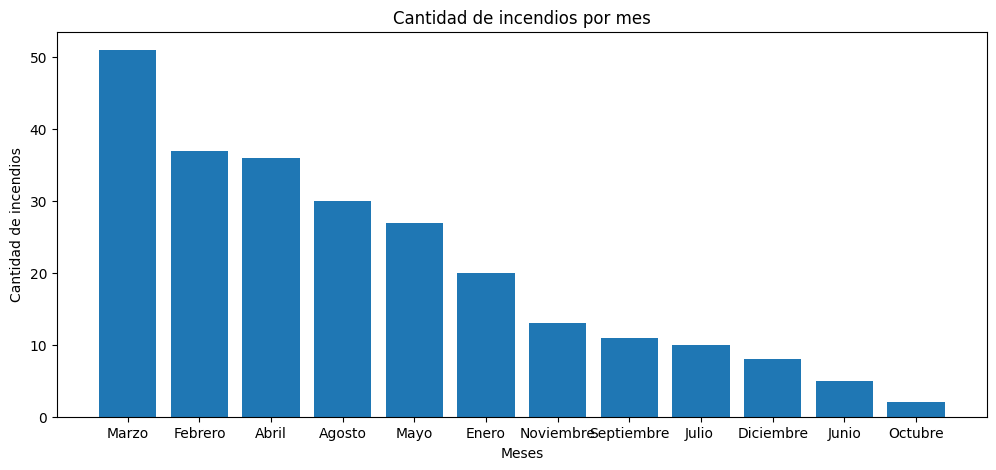

In [101]:
#¿Hay algún patrón estacional en la ocurrencia de los incendios forestales?

def fr_mes(fire):
    #Crea una serie con la cantidad de incendios por mes 
    fire_mes = pd.Series(fire["Mes de origen "].value_counts())

    #Grafica la informacion obtenida
    plt.figure(figsize=(12, 5))
    plt.bar(fire_mes.index, fire_mes.values)
    plt.title("Cantidad de incendios por mes")
    plt.xlabel("Meses")
    plt.ylabel("Cantidad de incendios")
    plt.show()


fr_mes(data)

## ¿Cuál es la duración promedio de un incendio forestal?

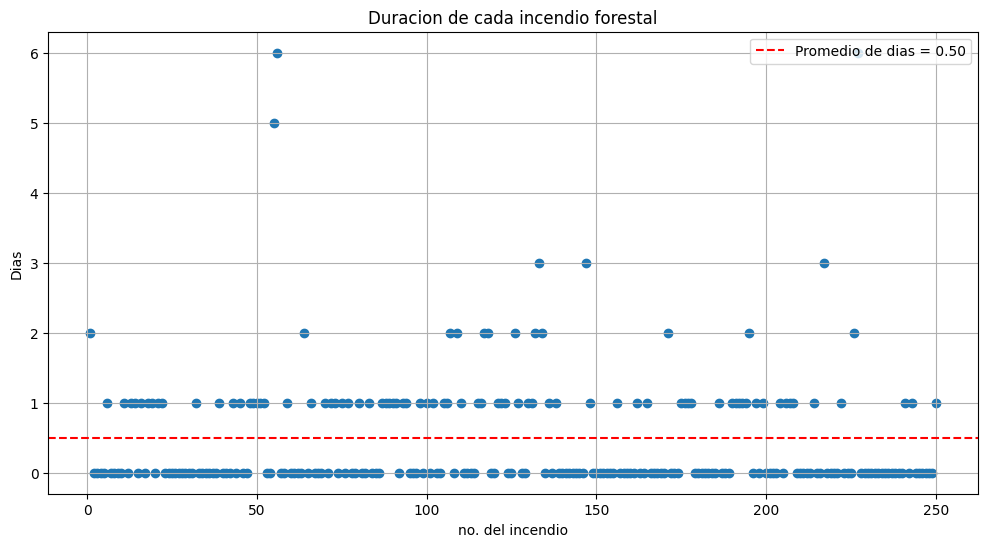

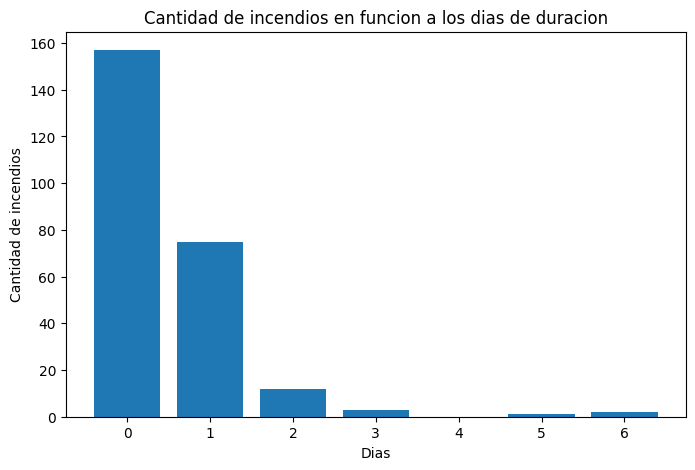

In [102]:
#¿Cuál es la duración promedio de un incendio forestal?

def d_prom(fire): #extrae la duracion promedio de los incendios en el dataframe
    #Crea otro DataFrame solo con las columnas deseadas
    delete = ["Municipio", "Provincia", "Fecha Mes", "Causas", "Area Afectada en Tareas", "Metros Cuadrados", "Dia de origen", "Dia extincion"]
    f_clean = fire.drop(delete, axis= 1).sort_values(by='no.')

    #Convierte el continido de las columnas a utilizar en tipo DateTime
    f_clean["Fecha origen"] = pd.to_datetime(f_clean["Fecha origen"], format='%m/%d/%Y')
    f_clean["Fecha Extincion"] = pd.to_datetime(f_clean["Fecha Extincion"], format='%m/%d/%Y')

    #Se descubrio que algunas informaciones sobre meses estaban erroneas, por lo que a continuacion se corrigen
    f_clean.loc[f_clean['Fecha Extincion'] < f_clean['Fecha origen'], 'Fecha Extincion'] = f_clean.loc[f_clean['Fecha Extincion'] < f_clean['Fecha origen'], 'Fecha Extincion'].apply(sum_m)

    #Crea otra columna con la diferencia en dias entre la fecha de inicio de los incendios y la fecha de extincion
    f_clean["Duracion en Dias"] = (f_clean["Fecha Extincion"] - f_clean["Fecha origen"]).dt.days

    #Grafica Duracion de cada incendio forestal
    plt.figure(figsize=(12, 6))
    plt.scatter(f_clean["no."], f_clean["Duracion en Dias"])
    plt.title("Duracion de cada incendio forestal")
    plt.xlabel("no. del incendio")
    plt.ylabel("Dias")
    plt.grid()
    prom = np.mean(f_clean["Duracion en Dias"])
    plt.axhline(y=prom, color='r', linestyle='--', label=f'Promedio de dias = {prom:.2f}')
    plt.legend(loc='upper right')
    plt.show()
    
    #Grafica Cantidad de incendios en funcion a los dias de duracion
    dat = f_clean["Duracion en Dias"].value_counts()
    plt.figure(figsize=(8, 5))
    plt.bar(dat.index, dat.values)
    plt.title("Cantidad de incendios en funcion a los dias de duracion")
    plt.xlabel("Dias")
    plt.ylabel("Cantidad de incendios")
    plt.show()

    #print(f_clean.sort_values(by='Duracion en Dias'))


def sum_m(fecha):
  fecha = dt.strftime(fecha, "%m-%d-%Y")
  m, d, y = fecha.split("-")
  m = int(m) + 1
  return dt.strptime(f"{m}-{d}-{y}", "%m-%d-%Y")

d_prom(data)